# Importing our modules

In [1]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [11]:
births = Table.read_table('baby.csv')
totals = Table.read_table('total_precipitation.csv')
births.show(5)
np.mean(births.column('Maternal Age'))

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


27.228279386712096

# Examining the Central Limit Theorem

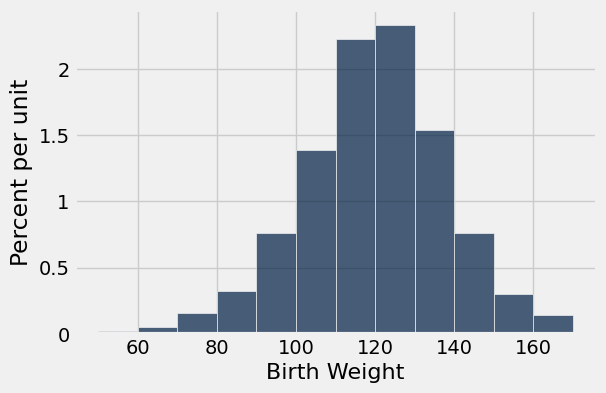

In [3]:
weight_bins = np.arange(50,180,10)
births.hist("Birth Weight",bins=weight_bins)

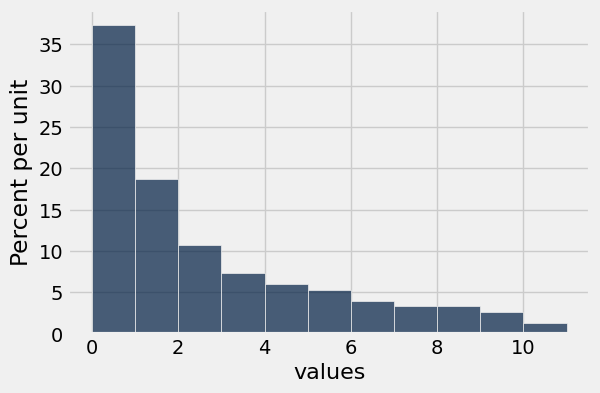

In [4]:
input_values = np.arange(0,15,0.1)
exponential_curve = 0.25*m.e**(0.25*input_values)

r_skew_bins = np.arange(0,12,1)
r_skew_table = Table().with_columns('values',exponential_curve)
r_skew_table.hist(bins=r_skew_bins)

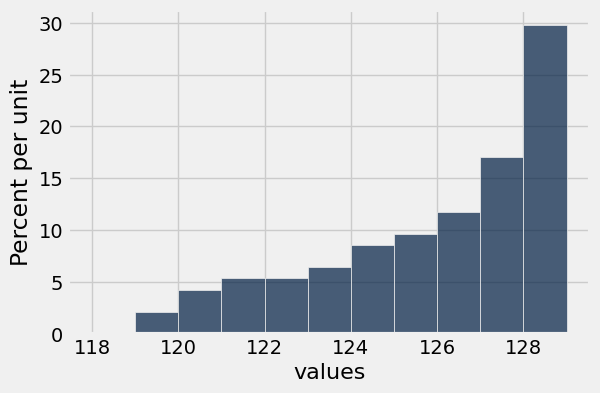

In [5]:
reverse_exponential = 130 - exponential_curve

l_skew_bins = np.arange(118,130,1)
l_skew_table = Table().with_columns('values',reverse_exponential)
l_skew_table.hist(bins = l_skew_bins)

### The Distribution of sample averages

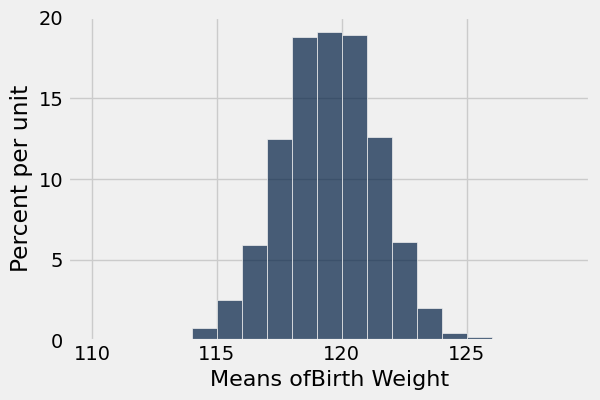

In [18]:
#Let's look at a few columns in the births table 
bins_we_use = np.arange(110,130,1)

sample_size = 100
number_of_resamples = 1000
column_name = 'Birth Weight'

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = births.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column(column_name))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means of'+column_name,means).hist(bins=bins_we_use)    

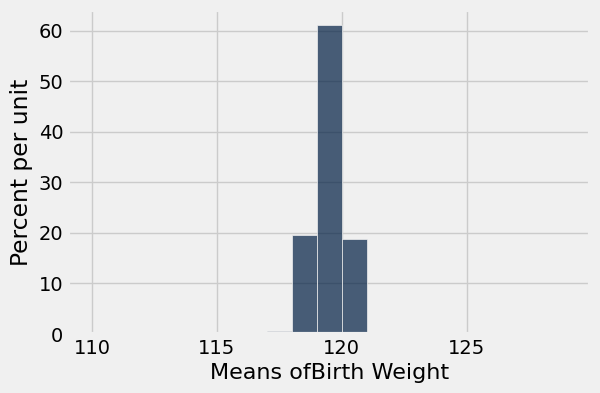

In [19]:
#Let's look at a few columns in the births table 
sample_size = 1000
number_of_resamples = 1000
column_name = 'Birth Weight'

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = births.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column(column_name))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means of'+column_name,means).hist(bins=bins_we_use)    

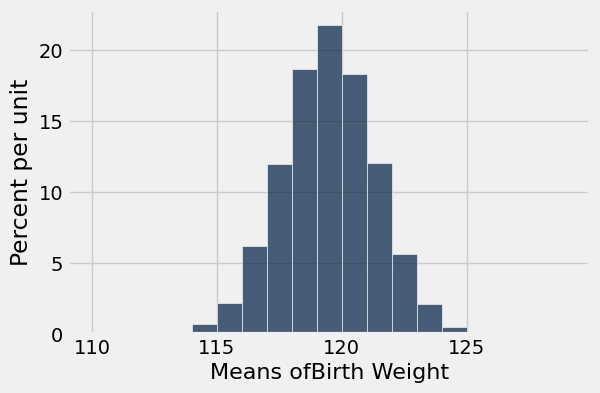

In [20]:
#Let's look at a few columns in the births table 
sample_size = 100
number_of_resamples = 10000
column_name = 'Birth Weight'

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = births.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column(column_name))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means of'+column_name,means).hist(bins=bins_we_use)    

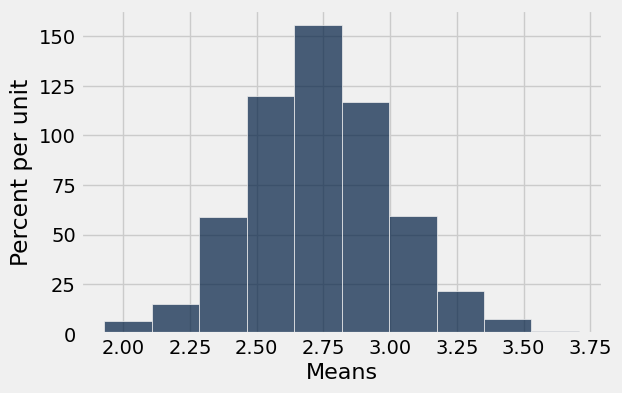

In [13]:
# Let's look at the right skew distribution
sample_size = 100
number_of_resamples = 1000

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = r_skew_table.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column('values'))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means',means).hist()    

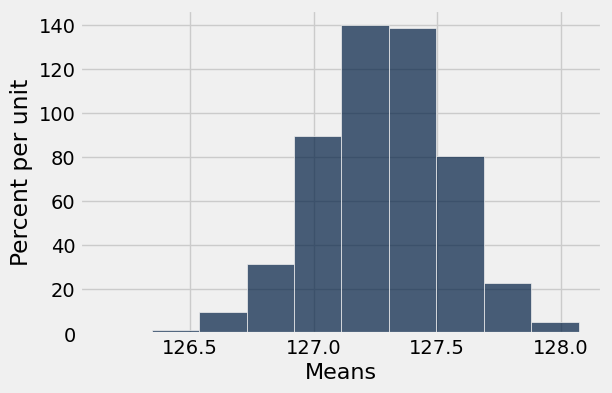

In [14]:
# Let's look a tthe left skew distribution
sample_size = 100
number_of_resamples = 1000

means = make_array()

for i in np.arange(number_of_resamples):
    one_small_sample = l_skew_table.sample(sample_size,with_replacement=True)
    mean_of_one_small_sample = np.mean(one_small_sample.column('values'))
    means = np.append(means, mean_of_one_small_sample)

Table().with_columns('Means',means).hist()   